<a href="https://colab.research.google.com/github/ishmeetk13/Ames-Linear-Regression/blob/main/Ames_Housing_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
saurabh0_ames_housing_sales_path = kagglehub.dataset_download('saurabh0/ames-housing-sales')

print('Data source import complete.')


100%|██████████| 96.4k/96.4k [00:00<00:00, 23.2MB/s]

Extracting files...
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabh0/ames-housing-sales")

print("Path to dataset files:", path)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Using Colab cache for faster access to the 'ames-housing-sales' dataset.
Path to dataset files: /kaggle/input/ames-housing-sales


In [ ]:
data=pd.read_csv("/kaggle/input/ames-housing-sales/Ames_Housing_Sales.csv")
data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,NaN,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0
5,796.0,566.0,320.0,NaN,1,1Fam,TA,No,732.0,0.0,...,0.0,Pave,5,796.0,AllPub,40.0,1993,1995,2009,143000.0
6,1694.0,0.0,0.0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,0.0,Pave,7,1686.0,AllPub,255.0,2004,2005,2007,307000.0
7,1107.0,983.0,0.0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,0.0,Pave,7,1107.0,AllPub,235.0,1973,1973,2009,200000.0
8,1022.0,752.0,0.0,NaN,2,1Fam,NaN,NaN,0.0,0.0,...,0.0,Pave,8,952.0,AllPub,90.0,1931,1950,2008,129900.0
9,1077.0,0.0,0.0,NaN,2,2fmCon,TA,No,851.0,0.0,...,0.0,Pave,5,991.0,AllPub,0.0,1939,1950,2008,118000.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          82 non-null     object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       953 non-null    object 
 7   BsmtExposure   953 non-null    object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   953 non-null    object 
 11  BsmtFinType2   952 non-null    object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       953 non-null    object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

# Encoding

In [ ]:
data.dtypes.value_counts()

,count
object,43
float64,21
int64,16


In [ ]:
mask=data.dtypes==object
mask

,0
1stFlrSF,False
2ndFlrSF,False
3SsnPorch,False
Alley,True
BedroomAbvGr,False
...,...
WoodDeckSF,False
YearBuilt,False
YearRemodAdd,False
YrSold,False


In [ ]:
categorical_cols=data.columns[mask]
categorical_cols

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [ ]:
data[categorical_cols].apply(lambda x: x.nunique())

,0
Alley,2
BldgType,5
BsmtCond,3
BsmtExposure,4
BsmtFinType1,5
BsmtFinType2,6
BsmtQual,4
CentralAir,2
Condition1,9
Condition2,8


In [ ]:
num_ohc_cols=(data[categorical_cols].apply(lambda x: x.nunique()).sort_values(ascending=False))
num_ohc_cols

,0
Neighborhood,25
Exterior2nd,16
Exterior1st,14
SaleType,9
Condition1,9
RoofMatl,8
HouseStyle,8
Condition2,8
Functional,7
GarageType,6


In [ ]:
small_num_ohc_cols=(num_ohc_cols.loc[num_ohc_cols>1])
small_num_ohc_cols

,0
Neighborhood,25
Exterior2nd,16
Exterior1st,14
SaleType,9
Condition1,9
RoofMatl,8
HouseStyle,8
Condition2,8
Functional,7
GarageType,6


In [ ]:
small_num_ohc_cols-=1
small_num_ohc_cols.sum()

np.int64(204)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
data_ohc=data.copy()
ohc=OneHotEncoder(drop="first")
print(num_ohc_cols.index)

Index(['Neighborhood', 'Exterior2nd', 'Exterior1st', 'SaleType', 'Condition1',
       'RoofMatl', 'HouseStyle', 'Condition2', 'Functional', 'GarageType',
       'BsmtFinType2', 'SaleCondition', 'Heating', 'Foundation', 'RoofStyle',
       'HeatingQC', 'BldgType', 'BsmtFinType1', 'Electrical', 'MSZoning',
       'LotConfig', 'GarageCond', 'FireplaceQu', 'GarageQual', 'BsmtExposure',
       'LotShape', 'BsmtQual', 'MiscFeature', 'KitchenQual', 'ExterCond',
       'Fence', 'ExterQual', 'LandContour', 'BsmtCond', 'GarageFinish',
       'PavedDrive', 'PoolQC', 'MasVnrType', 'LandSlope', 'CentralAir',
       'Alley', 'Street', 'Utilities'],
      dtype='object')


In [ ]:
for col in num_ohc_cols.index:
    new_data=ohc.fit_transform(data[[col]])
    data_ohc=data_ohc.drop(col,axis=1)
    cats=ohc.categories_[0][1:]
    new_cols=["_".join([col,str(cat)]) for cat in cats]
    new_df=pd.DataFrame(new_data.toarray(),columns=new_cols)
    data_ohc=pd.concat([data_ohc,new_df],axis=1)

In [ ]:
data_ohc.shape[1]-data.shape[1]

172

In [ ]:
print(data.shape[1])
data=data.drop(num_ohc_cols.index,axis=1)
print(data.shape[1])

80
37


# train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
y_col="SalePrice"
feature_cols=[x for x in data.columns if x!=y_col]

In [ ]:
X_data=data[feature_cols]
y_data=data[y_col]
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.3,random_state=42)

In [ ]:
feature_cols_ohc=[x for x in data_ohc if x!=y_col]
X_data_ohc=data_ohc[feature_cols_ohc]
y_data_ohc=data_ohc[y_col]
X_train_ohc,X_test_ohc,y_train_ohc,y_test_ohc=train_test_split(X_data_ohc,y_data_ohc,test_size=0.3,random_state=42)

In [ ]:
y_train_ohc.shape

(965,)

In [ ]:
(X_train_ohc.index==X_train.index).all()

np.True_

# Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR=LinearRegression()
error_df=list()
LR=LR.fit(X_data,y_data)
y_train_pred=LR.predict(X_train)
y_test_pred=LR.predict(X_test)
error_df.append(pd.Series({"train":mean_squared_error(y_train,y_train_pred),
                           "test": mean_squared_error(y_test,y_test_pred)},
                          name="no enc"))

LR=LR.fit(X_data_ohc,y_data_ohc)
y_train_ohc_pred=LR.predict(X_train_ohc)
y_test_ohc_pred=LR.predict(X_test_ohc)
error_df.append(pd.Series({"train":mean_squared_error(y_train_ohc,y_train_ohc_pred),
                 "test":mean_squared_error(y_test_ohc,y_test_ohc_pred)},
                name="one-hot encoded"))

error_df=pd.concat(error_df,axis=1)
error_df

,no enc,one-hot encoded
train,1.150394e+09,4.038806e+08
test,1.249274e+09,4.970560e+08


# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scalers={"Standard":StandardScaler(),
         "MinMax":MinMaxScaler()}
LR=LinearRegression()
errors={}
for scaler_label,scaler in scalers.items():
    trainingset=scaler.fit_transform(X_train)
    testset=scaler.transform(X_test)
    LR.fit(trainingset,y_train)
    predictions=LR.predict(testset)
    key=scaler_label+" scaling:"
    errors[key]=mean_squared_error(y_test,predictions)
    errors=pd.Series(errors)

for key,val in errors.items():
        print(key,val)

Standard scaling: 1372182358.9345083
MinMax scaling: 1372182358.934509


# Visualization

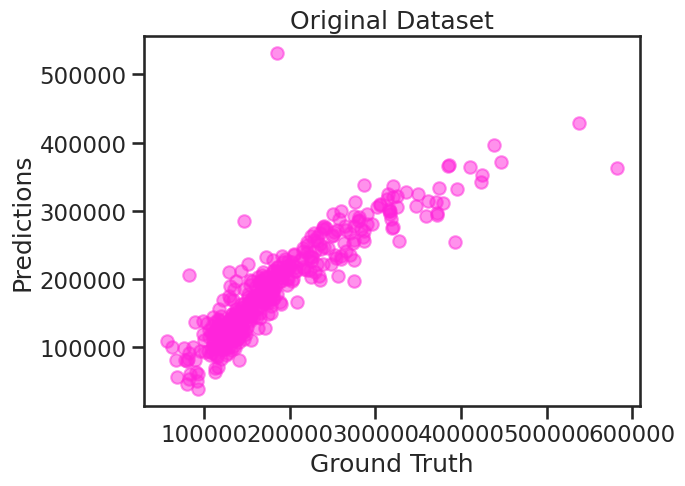

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("ticks")
sns.set_palette("spring")
ax=plt.axes()
ax.scatter(y_test,y_test_pred,alpha=0.5)
ax.set(xlabel="Ground Truth",
      ylabel="Predictions",
      title="Original Dataset")
plt.show()

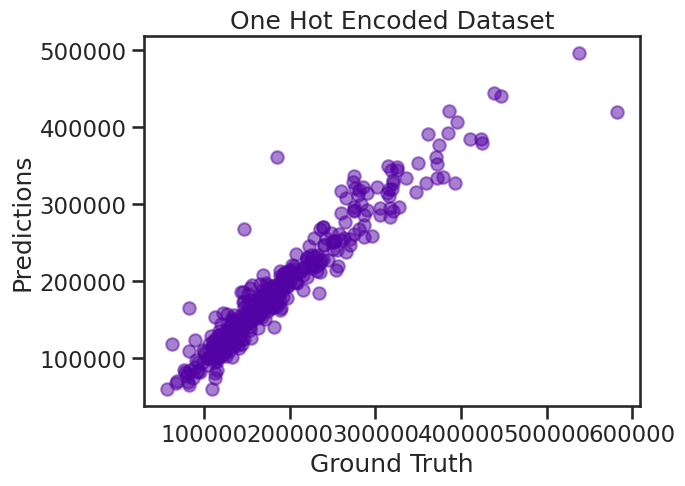

In [ ]:
sns.set_context("talk")
sns.set_style("ticks")
sns.set_palette("plasma")
ax=plt.axes()
ax.scatter(y_test_ohc,y_test_ohc_pred,alpha=0.5)
ax.set(xlabel="Ground Truth",
      ylabel="Predictions",
      title="One Hot Encoded Dataset")
plt.show()

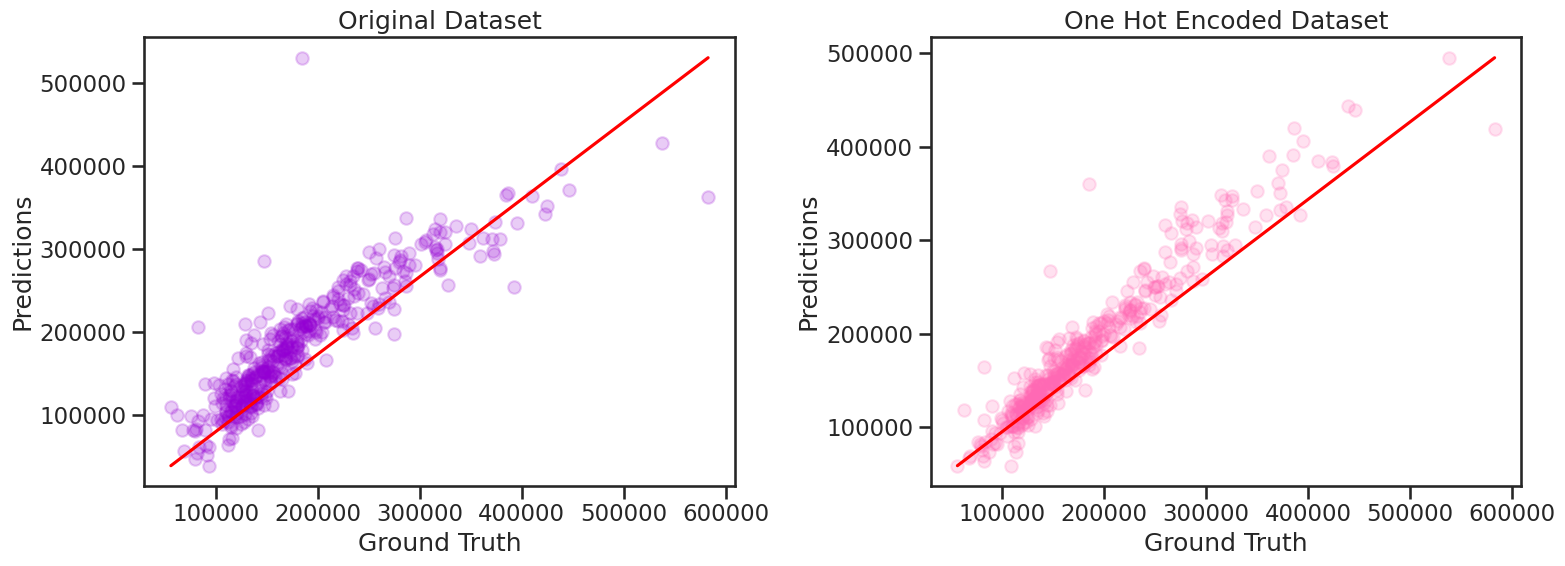

In [ ]:
sns.set_context("talk")
sns.set_style("ticks")
plt.figure(figsize=(16,6))
#1
plt.subplot(1,2,1)
plt.scatter(y_test,y_test_pred,alpha=0.2,color="darkviolet")

plt.plot([y_test.min(),y_test.max()],[y_test_pred.min(),y_test_pred.max()],linestyle="-",color="r")
plt.title("Original Dataset")
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")

#2
plt.subplot(1,2,2)
plt.scatter(y_test_ohc,y_test_ohc_pred,alpha=0.2,color="hotpink")

plt.plot([y_test_ohc.min(),y_test_ohc.max()],[y_test_ohc_pred.min(),y_test_ohc_pred.max()],linestyle="-",color="r")
plt.title("One Hot Encoded Dataset")
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")

plt.tight_layout()
plt.show()